# Numerical differentiation

by Xiaofeng Liu, Ph.D., P.E.
Associate Professor

Department of Civil and Environmental Engineering

Institute of CyberScience

Penn State University 

223B Sackett Building, University Park, PA 16802

Web: http://water.engr.psu.edu/liu/

---

## Numerical differentiation

This Jupyter Notebook implements and demonstrates numerical differentiation. 

The following is an implementation of the forward, backward, and central differencing schemes.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp  
import sys

#calculate and return the first derivative of the function f(x) at x=x0 with a step
#size h. Three finite differencing schemes are implemented: foward, 
#backward, and central.
def first_derivative(f,x0,method,h):
    if method == 'central':
        return (f(x0 + h) - f(x0 - h))/(2*h)
    elif method == 'forward':
        return (f(x0 + h) - f(x0))/h
    elif method == 'backward':
        return (f(x0) - f(x0 - h))/h
    else:
        raise ValueError("Wrong choice of scheme. Must be 'central', 'forward' or 'backward'.")
        

#define the function
def func(x):
    return x*np.exp(x)

#set parameters
x0 = 0.2
h = 0.01

print("Derivative with central differencing = ", first_derivative(func,x0,'central',h))
print("Derivative with forward differencing = ", first_derivative(func,x0,'forward',h))
print("Derivative with backward differencing = ", first_derivative(func,x0,'backward',h))
print("Exact derivative with analyitical solution = ", (1.0+x0)*np.exp(x0))

Derivative with central differencing =  1.4657484518019153
Derivative with forward differencing =  1.4791840958882085
Derivative with backward differencing =  1.4523128077156222
Exact derivative with analyitical solution =  1.4656833097922037


## Noise and error effect in numerical derivatives

Noise and error in data can have a huge effect in the numerical derivatives becasue the differentiation operation amplifies the perturbations. You can imagine that numerical integration is more noise tolerant. 

The following example caculates and plots the derivative of a simple function. Some random noise (perturbation) is added to the function values and then the derivatives from both the original and perturbed function values are compared. 

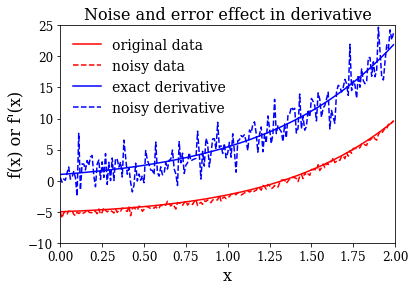

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp  
import sys

#plt.rc('text', usetex=True)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"

#calculate and return the first derivative of the function f(x) at x=x0 with a step
#size h. Three finite differencing schemes are implemented: foward, 
#backward, and central.
def first_derivative(f,x0,method,h):
    if method == 'central':
        return (f(x0 + h) - f(x0 - h))/(2*h)
    elif method == 'forward':
        return (f(x0 + h) - f(x0))/h
    elif method == 'backward':
        return (f(x0) - f(x0 - h))/h
    else:
        raise ValueError("Wrong choice of scheme. Must be 'central', 'forward' or 'backward'.")

        

#define the function
def func(x):
    return x*np.exp(x)-5

#define the noisy function
#The noise follows a random normal distribution
def func_noisy(x):
    return x*np.exp(x) -5 + np.random.normal(-0.3,0.3,len(x))

#analyitcal derivative 
def func_prime(x):
    return (1+x)*np.exp(x)


x = np.arange(0,2,0.01)
f = func(x)
fprime = func_prime(x)
f_noisy = func_noisy(x)

fprime_noisy = first_derivative(func_noisy,x,'central',0.1)

#plot the function (original and perturbed)
plt.plot(x, f, 'r', label="original data")
plt.plot(x, f_noisy, 'r--', label="noisy data")

#plot the derivative (original and perturbed)
plt.plot(x, fprime, 'b', label="exact derivative")
plt.plot(x, fprime_noisy, 'b--', label="noisy derivative")

#set the limit for the x and y axes
plt.xlim([0,2])
plt.ylim([-10,25])

#set x and y axes label and font size
plt.xlabel('x',fontsize=16)
plt.ylabel('f(x) or f\'(x)',fontsize=16)

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=12)

#show title and set font size
plt.title('Noise and error effect in derivative',fontsize=16)

#show legend, set its location, font size, and turn off the frame
plt.legend(loc='upper left',fontsize=14,frameon=False)
#plt.savefig("noisy_derivative.png",dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

There are several options to deal with noisy data. Most of them use some level of smoothing or filtering to the noisy data and then use the filtered data to calculate numerical derivative. The following example shows the use of B-spline curve fitting with the noisy data. Curve fitting here serves as a filter. 

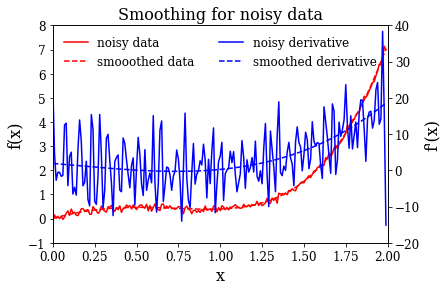

In [3]:
import numpy as np
from scipy.interpolate import splrep, splev
import matplotlib.pyplot as plt
from math import exp  
import scipy
import sys

#plt.rc('text', usetex=True)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"

#define the function
def func(x):
    #return 2*x**4-x**3-5*x**2-x+5
    return np.polynomial.polynomial.polyval(x,[0,2,-2,-0.6,1])

#define the noisy function
def func_noisy(x):
    return func(x) + np.random.normal(0,0.1,len(x))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

#plot the function 
x = np.arange(0,2,0.01)
f = func(x)
f_noisy = func_noisy(x)

#calcualte the derivative using the noisy data
fprime_noisy = np.gradient(f_noisy,x)

#fit the noisy data to splines
spl = splrep(x,f_noisy,k=5,s=3)

#use the fitted spline to evaluate the new (smoothed) 
#function value
f_smoothed = splev(x, spl)

#use the fitted spline to evaluate the new (smoothed)
#function derivative
fprime_smoothed = splev(x,spl,der=1)

#plot the noisy and smooth function values
ax1.plot(x, f_noisy, 'r', label="noisy data")
ax1.plot(x, f_smoothed, 'r--', label="smooothed data")

#plot the derivatives from the noisy and smoothed function values
ax2.plot(x, fprime_noisy, 'b', label="noisy derivative")
ax2.plot(x, fprime_smoothed, 'b--', label="smoothed derivative")

#set the limit for the x and y axes
ax1.set_xlim([0,2])
ax1.set_ylim([-1,8])
ax2.set_ylim([-20,40])

#set x and y axes label and font size
ax1.set_xlabel('x',fontsize=16)
ax1.set_ylabel('f(x)',fontsize=16)
ax2.set_ylabel('f\'(x)',fontsize=16)

#show the ticks on both axes and set the font size 
ax1.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)

#show title and set font size
plt.title('Smoothing for noisy data',fontsize=16)

#show legend, set its location, font size, and turn off the frame
ax1.legend(loc='upper left',fontsize=12,frameon=False)
ax2.legend(loc='upper right',fontsize=12,frameon=False)

#plt.savefig("smoothing_noisy_derivative.png",dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

## Python libraries and functions for differentiation

Scipy proives the "derivative(...)" function to evaluate the derivative using central differencing with different orders. 
[scipy.misc.derivative](https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html)

In [170]:
import numpy as np
import scipy.misc

#define the function
def func(x):
    return x*np.exp(x)-5

x0 = 0.2
h = 0.01

print("Derivative calculated by scipy.misc.derivative(...) function = ", scipy.misc.derivative(func,x0,h))

Derivative calculated by scipy.misc.derivative(...) function =  1.4657484518019182


Numpy also provides the "gradient(...)" function to compute the second-order accurate central differences in the interior points and either first- or second-order accurate forward or backward differences at the boundaryies. 
[numpy.gradient(...)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.gradient.html).

In [171]:
import numpy as np

#define the function
def func(x):
    return x*np.exp(x)-5

x = np.arange(0,1,0.1)
f = func(x)

fprime = np.gradient(f,x)

print("x = ", x)
print("Derivative calculated by np.gradient(...) function = \n", fprime)

x =  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
Derivative calculated by np.gradient(...) function = 
 [1.10517092 1.22140276 1.47220275 1.76224664 2.09701497 2.48270701
 2.9263313  3.43580731 4.02007952 4.33210057]


As we have seen in previous example, Scipy's interpolate module also provides interpolation functionalities which can be used to take derivatives. For example, the B-spline interpolation function scipy.interpolate.splrep and scipy.interpolate.splev. Examples on how to use them can be found in their documentation.

In addition, there are several smoothing/filtering functions which can be applied to noisy data to remove the bumpiness and then to get better approximation to derivatives. One of them is the **signal** model in scipy. [scipy.signal](https://docs.scipy.org/doc/scipy-0.16.1/reference/signal.html). For example, scipy.signal.savgol_filter(...) function. Examples on how to use them can be found in their documentation. 